In [2]:
from sklearn.datasets import *
import pandas as pd

breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
sy = pd.Series(breast_cancer.target, dtype = 'category')
sy = sy.cat.rename_categories(breast_cancer.target_names)
df['target'] = sy
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

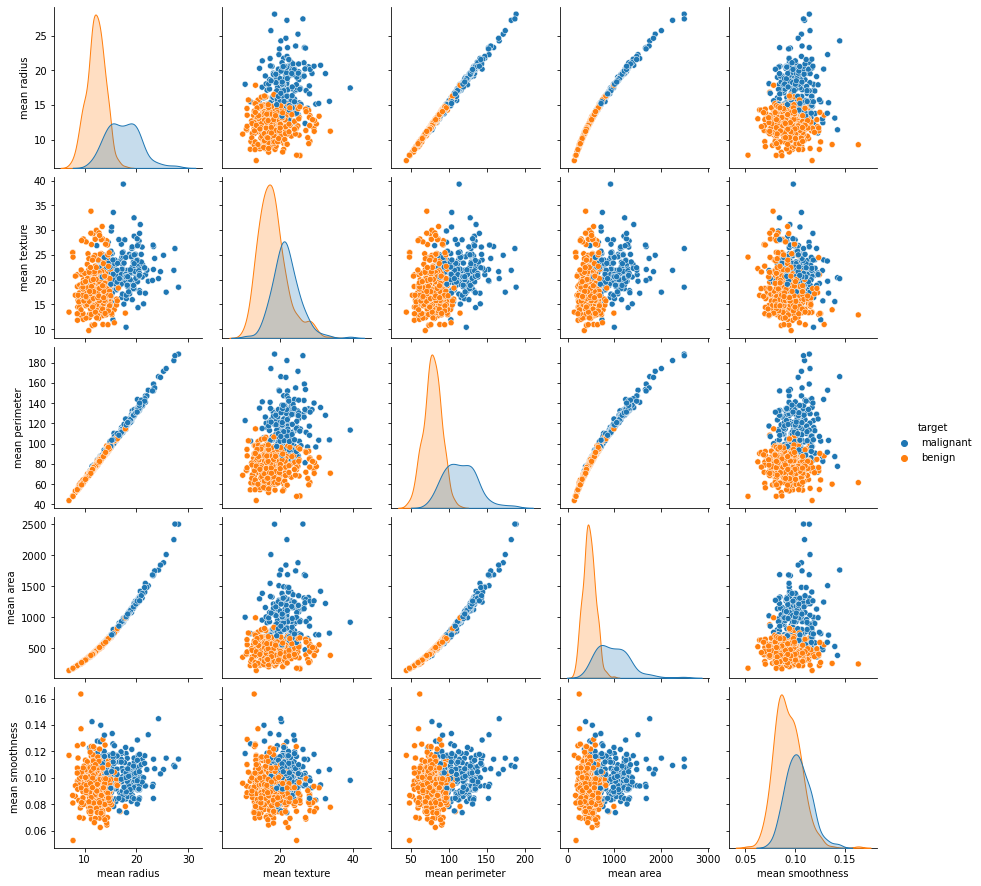

In [5]:
import seaborn as sns

sns.pairplot(vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], data = df, hue = 'target')

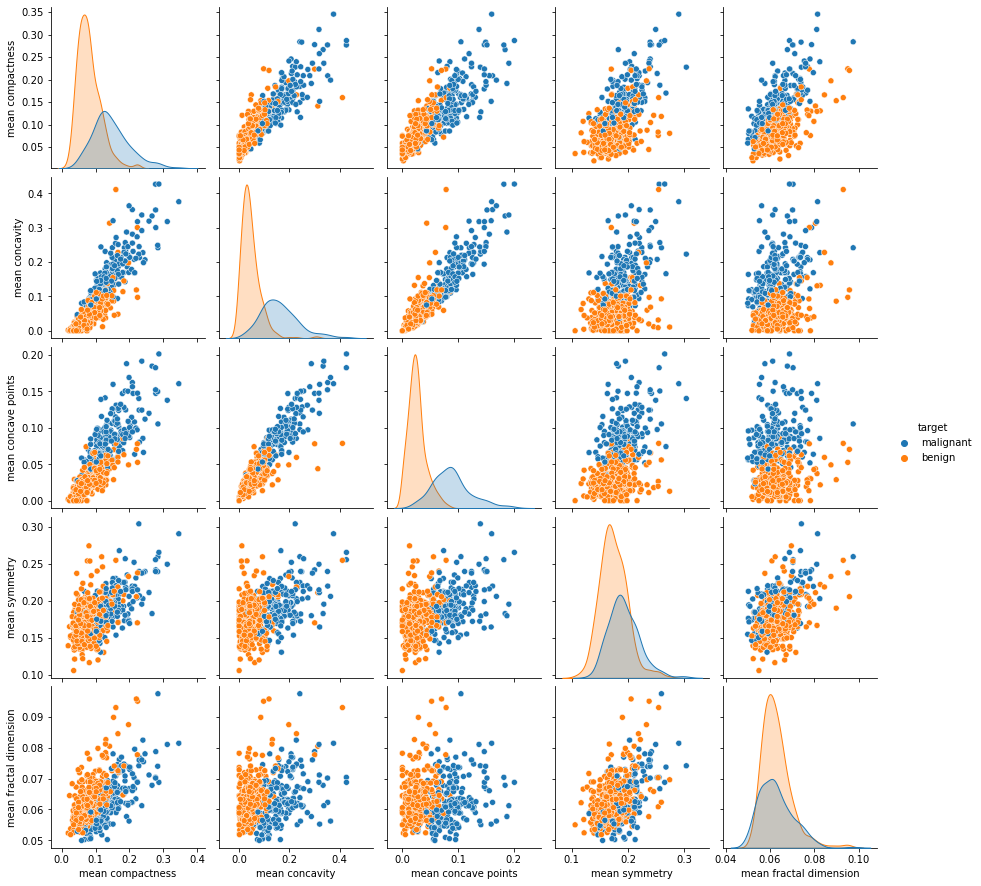

In [8]:
sns.pairplot(vars = ['mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'], data = df, hue = 'target')

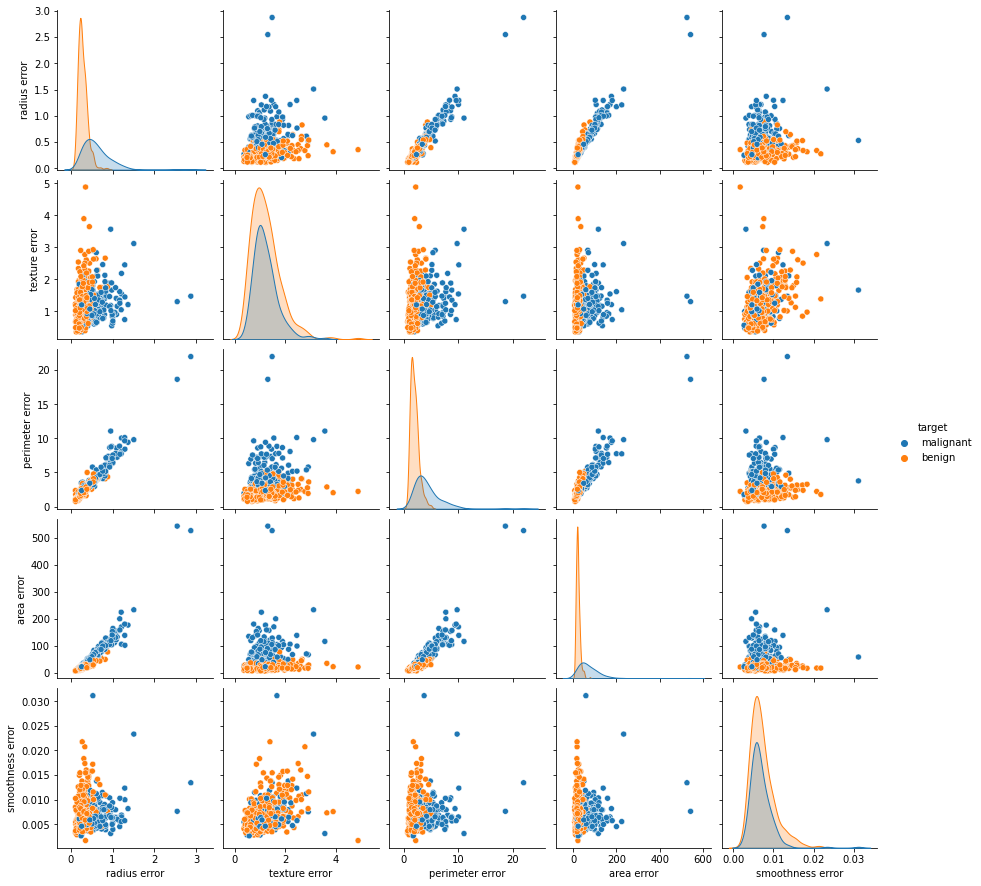

In [9]:
sns.pairplot(vars = ['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error'], data = df, hue = 'target')

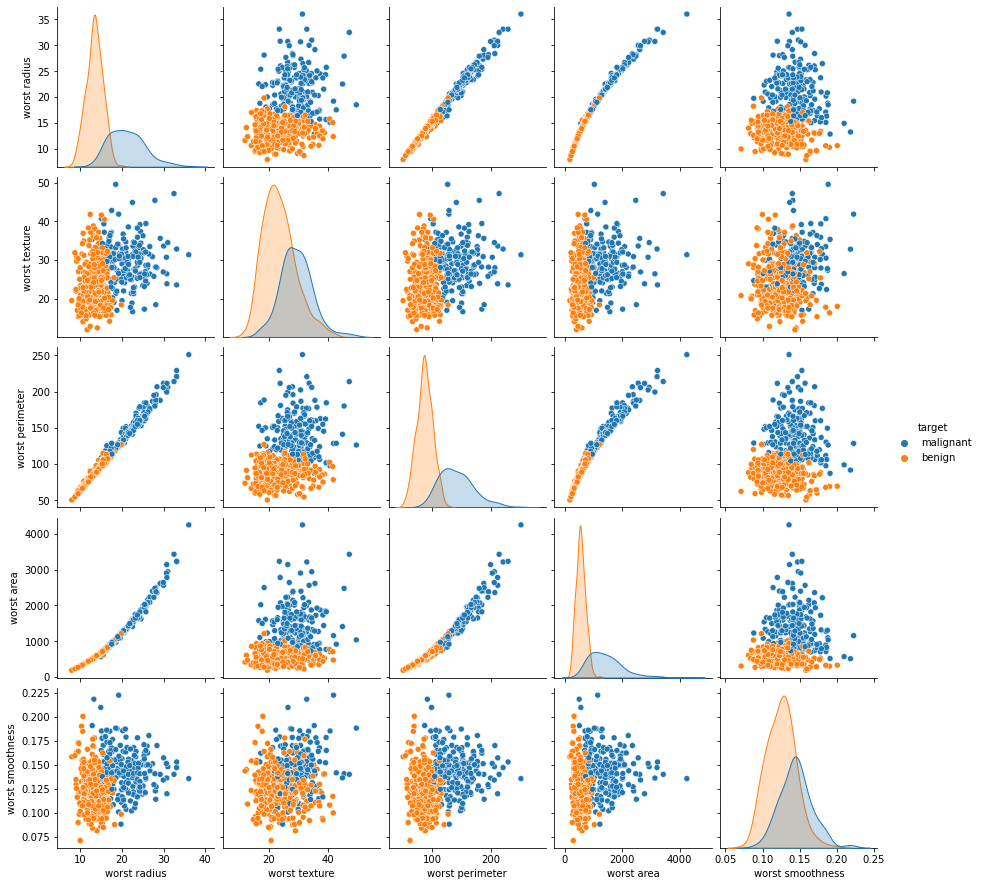

In [10]:
sns.pairplot(vars = ['worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness'], data = df, hue = 'target')

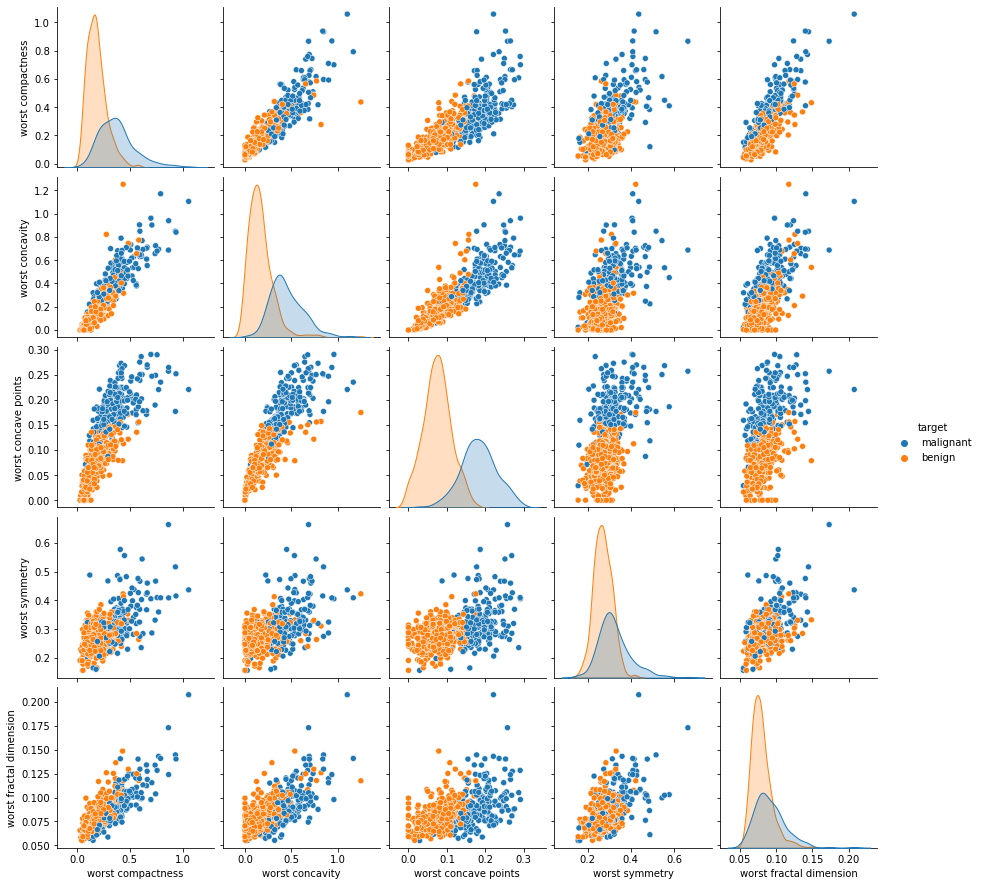

In [11]:
sns.pairplot(vars = ['worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], data = df, hue = 'target')

### 학습할 피쳐 선정

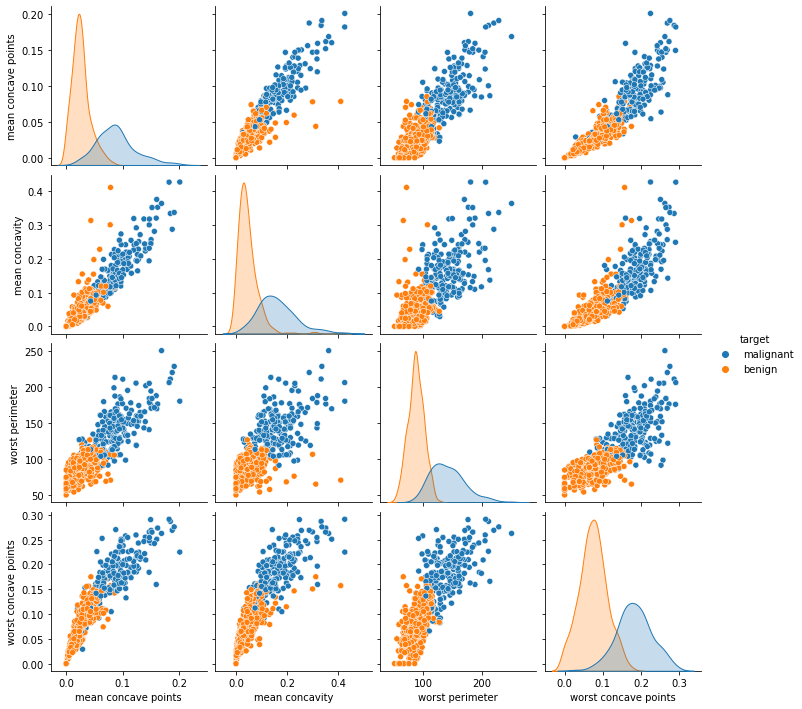

In [13]:
sns.pairplot(vars = ['mean concave points', 'mean concavity', 'worst perimeter', 'worst concave points'], data = df, hue = 'target')

In [16]:
X_data = df[['mean concave points', 'mean concavity', 'worst perimeter', 'worst concave points']].values
Y_data = df['target'].replace(['malignant', 'benign'], [0, 1]).values

In [17]:
from tensorflow.keras.utils import to_categorical

Y_data = to_categorical(Y_data)
Y_data

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### 데이터 전처리

In [18]:
from sklearn.model_selection import train_test_split

x_data, tt_x, y_data, tt_y = train_test_split(X_data, Y_data, random_state = 1)
t_x, v_x, t_y, v_y = train_test_split(x_data, y_data, random_state = 1, test_size = 0.2)

### 모델 학습 및 생성

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

m = Sequential()
m.add(Dense(2, input_dim = 4, activation = 'sigmoid'))
m.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
hy = m.fit(t_x, t_y, epochs = 250, batch_size = 1, validation_data = (v_x, v_y))

Epoch 1/250
340/340 [==============================] - 1s 873us/step - loss: 20.8843 - accuracy: 0.3765 - val_loss: 15.1688 - val_accuracy: 0.3372
Epoch 2/250
340/340 [==============================] - 0s 583us/step - loss: 9.6317 - accuracy: 0.3765 - val_loss: 5.9997 - val_accuracy: 0.3372
Epoch 3/250
340/340 [==============================] - 0s 592us/step - loss: 2.3808 - accuracy: 0.4647 - val_loss: 0.7131 - val_accuracy: 0.6628
Epoch 4/250
340/340 [==============================] - 0s 796us/step - loss: 0.6829 - accuracy: 0.6294 - val_loss: 0.6495 - val_accuracy: 0.6628
Epoch 5/250
340/340 [==============================] - 0s 709us/step - loss: 0.6650 - accuracy: 0.6206 - val_loss: 0.6464 - val_accuracy: 0.6628
Epoch 6/250
340/340 [==============================] - 0s 687us/step - loss: 0.6543 - accuracy: 0.6500 - val_loss: 0.6434 - val_accuracy: 0.5581
Epoch 7/250
340/340 [==============================] - 0s 844us/step - loss: 0.6415 - accuracy: 0.6618 - val_loss: 0.6282 - val_

340/340 [==============================] - 0s 827us/step - loss: 0.3414 - accuracy: 0.9118 - val_loss: 0.3136 - val_accuracy: 0.8953
Epoch 58/250
340/340 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9118 - val_loss: 0.3068 - val_accuracy: 0.9651
Epoch 59/250
340/340 [==============================] - 0s 988us/step - loss: 0.3384 - accuracy: 0.9088 - val_loss: 0.3058 - val_accuracy: 0.9767
Epoch 60/250
340/340 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.9235 - val_loss: 0.3388 - val_accuracy: 0.9419
Epoch 61/250
340/340 [==============================] - 0s 741us/step - loss: 0.3301 - accuracy: 0.9147 - val_loss: 0.3045 - val_accuracy: 0.9767
Epoch 62/250
340/340 [==============================] - 0s 809us/step - loss: 0.3277 - accuracy: 0.9176 - val_loss: 0.2943 - val_accuracy: 0.9302
Epoch 63/250
340/340 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.9206 - val_loss: 0.2906 - val_accuracy: 0.94

340/340 [==============================] - 0s 830us/step - loss: 0.2416 - accuracy: 0.9382 - val_loss: 0.2207 - val_accuracy: 0.8953
Epoch 114/250
340/340 [==============================] - 0s 888us/step - loss: 0.2452 - accuracy: 0.9206 - val_loss: 0.2057 - val_accuracy: 0.9767
Epoch 115/250
340/340 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.92 - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9353 - val_loss: 0.1991 - val_accuracy: 0.9651
Epoch 116/250
340/340 [==============================] - 0s 941us/step - loss: 0.2348 - accuracy: 0.9353 - val_loss: 0.2004 - val_accuracy: 0.9419
Epoch 117/250
340/340 [==============================] - 0s 737us/step - loss: 0.2356 - accuracy: 0.9324 - val_loss: 0.2082 - val_accuracy: 0.9070
Epoch 118/250
340/340 [==============================] - 0s 962us/step - loss: 0.2369 - accuracy: 0.9294 - val_loss: 0.2083 - val_accuracy: 0.9070
Epoch 119/250
340/340 [==============================] - 0s 949us/step - loss: 0.2324 - accu

Epoch 169/250
340/340 [==============================] - 0s 750us/step - loss: 0.2010 - accuracy: 0.9294 - val_loss: 0.1916 - val_accuracy: 0.9419
Epoch 170/250
340/340 [==============================] - 0s 718us/step - loss: 0.2048 - accuracy: 0.9147 - val_loss: 0.1643 - val_accuracy: 0.9419
Epoch 171/250
340/340 [==============================] - 0s 722us/step - loss: 0.2030 - accuracy: 0.9235 - val_loss: 0.1570 - val_accuracy: 0.9767
Epoch 172/250
340/340 [==============================] - 0s 723us/step - loss: 0.2019 - accuracy: 0.9235 - val_loss: 0.1564 - val_accuracy: 0.9651
Epoch 173/250
340/340 [==============================] - 0s 936us/step - loss: 0.2007 - accuracy: 0.9235 - val_loss: 0.1624 - val_accuracy: 0.9419
Epoch 174/250
340/340 [==============================] - 1s 3ms/step - loss: 0.2035 - accuracy: 0.9206 - val_loss: 0.1599 - val_accuracy: 0.9884
Epoch 175/250
340/340 [==============================] - 1s 1ms/step - loss: 0.1993 - accuracy: 0.9294 - val_loss: 0.156

Epoch 225/250
340/340 [==============================] - 0s 577us/step - loss: 0.1846 - accuracy: 0.9353 - val_loss: 0.1394 - val_accuracy: 1.0000
Epoch 226/250
340/340 [==============================] - 0s 600us/step - loss: 0.1822 - accuracy: 0.9294 - val_loss: 0.1361 - val_accuracy: 0.9767
Epoch 227/250
340/340 [==============================] - 0s 571us/step - loss: 0.1826 - accuracy: 0.9206 - val_loss: 0.1375 - val_accuracy: 0.9884
Epoch 228/250
340/340 [==============================] - 0s 629us/step - loss: 0.1843 - accuracy: 0.9118 - val_loss: 0.1422 - val_accuracy: 0.9767
Epoch 229/250
340/340 [==============================] - 0s 576us/step - loss: 0.1852 - accuracy: 0.9265 - val_loss: 0.1357 - val_accuracy: 0.9767
Epoch 230/250
340/340 [==============================] - 0s 587us/step - loss: 0.1826 - accuracy: 0.9353 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 231/250
340/340 [==============================] - 0s 556us/step - loss: 0.1835 - accuracy: 0.9294 - val_loss: 0

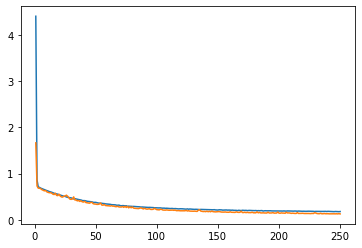

In [22]:
import matplotlib.pyplot as plt

ec = range(1, len(hy.history['accuracy']) + 1)
plt.plot(ec, hy.history['loss'])
plt.plot(ec, hy.history['val_loss'])
plt.show()

In [23]:
m.evaluate(tt_x, tt_y)

5/5 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.9441


[0.2228071540594101, 0.9440559148788452]